In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import time
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import OneHotEncoder
import unicodedata

# Specifying figure layout
%matplotlib inline
pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')
sns.set_color_codes('bright')
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
plt.rcParams["figure.figsize"] = (15, 10)

In [193]:
# Load data
df = pd.read_csv('../../data/processed/transport_industry_cluster_model_train.csv')

### PCA Components

In [194]:
df.shape
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.521190,0.386912,1.185980,-1.053649,1.424322,-0.213326
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.199804,0.731121,0.865604,1.861526,1.424322,2.110809
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.350131,-0.397119,0.279576,0.565893,1.424322,1.077860
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.413611,-0.397119,0.994147,-1.053649,1.424322,-0.213326
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.939453,6.343633,2.815453,-1.053649,3.771941,0.819623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.395943,-0.397119,1.096759,0.565893,0.250512,0.561385
6666,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.709472,2.413918,7.126529,-1.053649,0.250512,-0.729801
6667,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.558132,0.511210,1.842909,1.213709,0.250512,1.077860
6668,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.480590,2.413918,3.239257,-0.729741,0.250512,-0.471564


In [195]:
model_array = df.to_numpy()

In [196]:
# # defining a utility function for testing the clustering algorithms
# def plot_clusters(data, algorithm, kwds):
#     # cluster the data while taking the time the process needs 
#     start_time = time.time()
#     labels = algorithm(**kwds).fit_predict(data)
#     end_time = time.time()
    
#     # defining the colors for visual representation
#     palette = sns.color_palette('bright', np.unique(labels).max() + 1)
#     colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    
#     # plotting the data, removing the axis and adding title and time 
#     plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
#     frame = plt.gca()
#     frame.axes.get_xaxis().set_visible(False)
#     frame.axes.get_yaxis().set_visible(False)
#     plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
#     plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

### Principal Components Analysis

In [197]:
from sklearn.decomposition import PCA
# Initialize PCA
pca = PCA(n_components=5)

# Apply PCA
pca_result = pca.fit_transform(model_array)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Check explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)
total_explained_variance = pca.explained_variance_ratio_.sum()
print("Total explained variance ratio:", total_explained_variance)

Explained variance ratio: [0.39816985 0.24354803 0.10327368 0.05539741 0.04326241]
Total explained variance ratio: 0.8436513927537126


### K-Means

In [198]:
# Initialize KMeans with desired number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit KMeans on PCA-reduced data
kmeans.fit(pca_df)

# Get cluster labels
pca_df['cluster_kmeans'] = kmeans.labels_


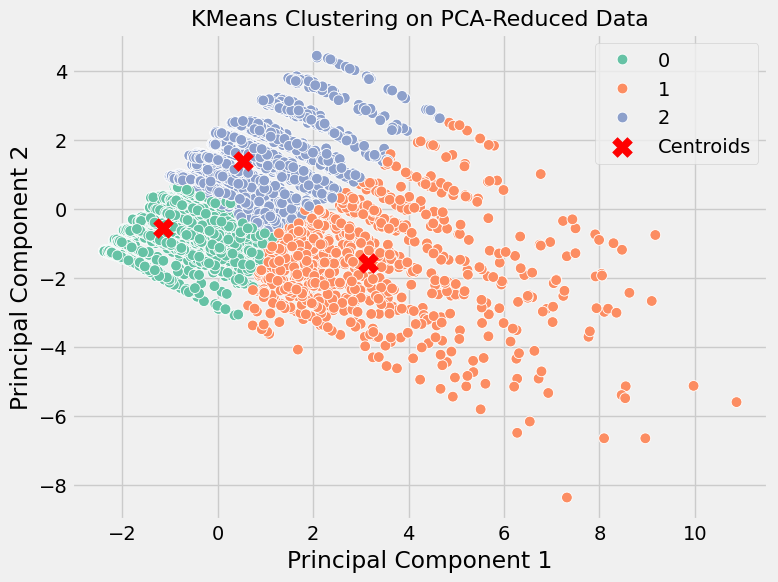

In [199]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster_kmeans', data=pca_df, palette='Set2', s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', label='Centroids', marker='X')
plt.title('KMeans Clustering on PCA-Reduced Data', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [200]:
# sns.pairplot(pca_df, hue='cluster_kmeans',  palette='Set2')

### Agglomerative Clustering

In [201]:
# Initialize KMeans with desired number of clusters (e.g., 3)
agg_cluster = AgglomerativeClustering(n_clusters= 5, linkage='ward')

# Fit KMeans on PCA-reduced data
agg_cluster.fit_predict(model_array)

# Get cluster labels
pca_df['cluster_agg'] = agg_cluster.labels_


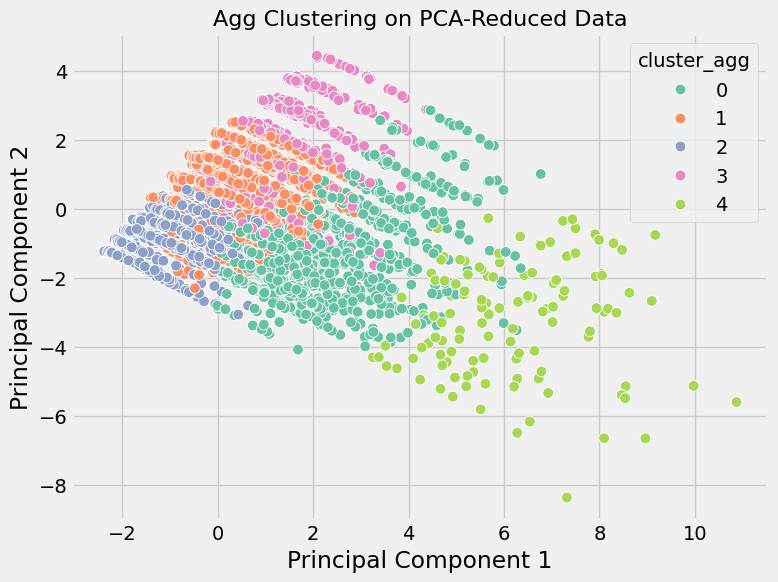

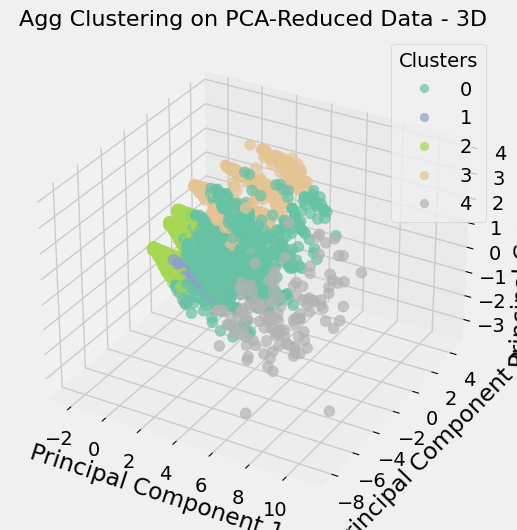

In [202]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster_agg', data=pca_df, palette='Set2', s=60)
plt.title('Agg Clustering on PCA-Reduced Data', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], 
                c=pca_df['cluster_agg'], cmap='Set2', s=60, alpha=0.7)
ax.set_title('Agg Clustering on PCA-Reduced Data - 3D', fontsize=16)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend(*sc.legend_elements(), title="Clusters")
plt.show()
plt.show()


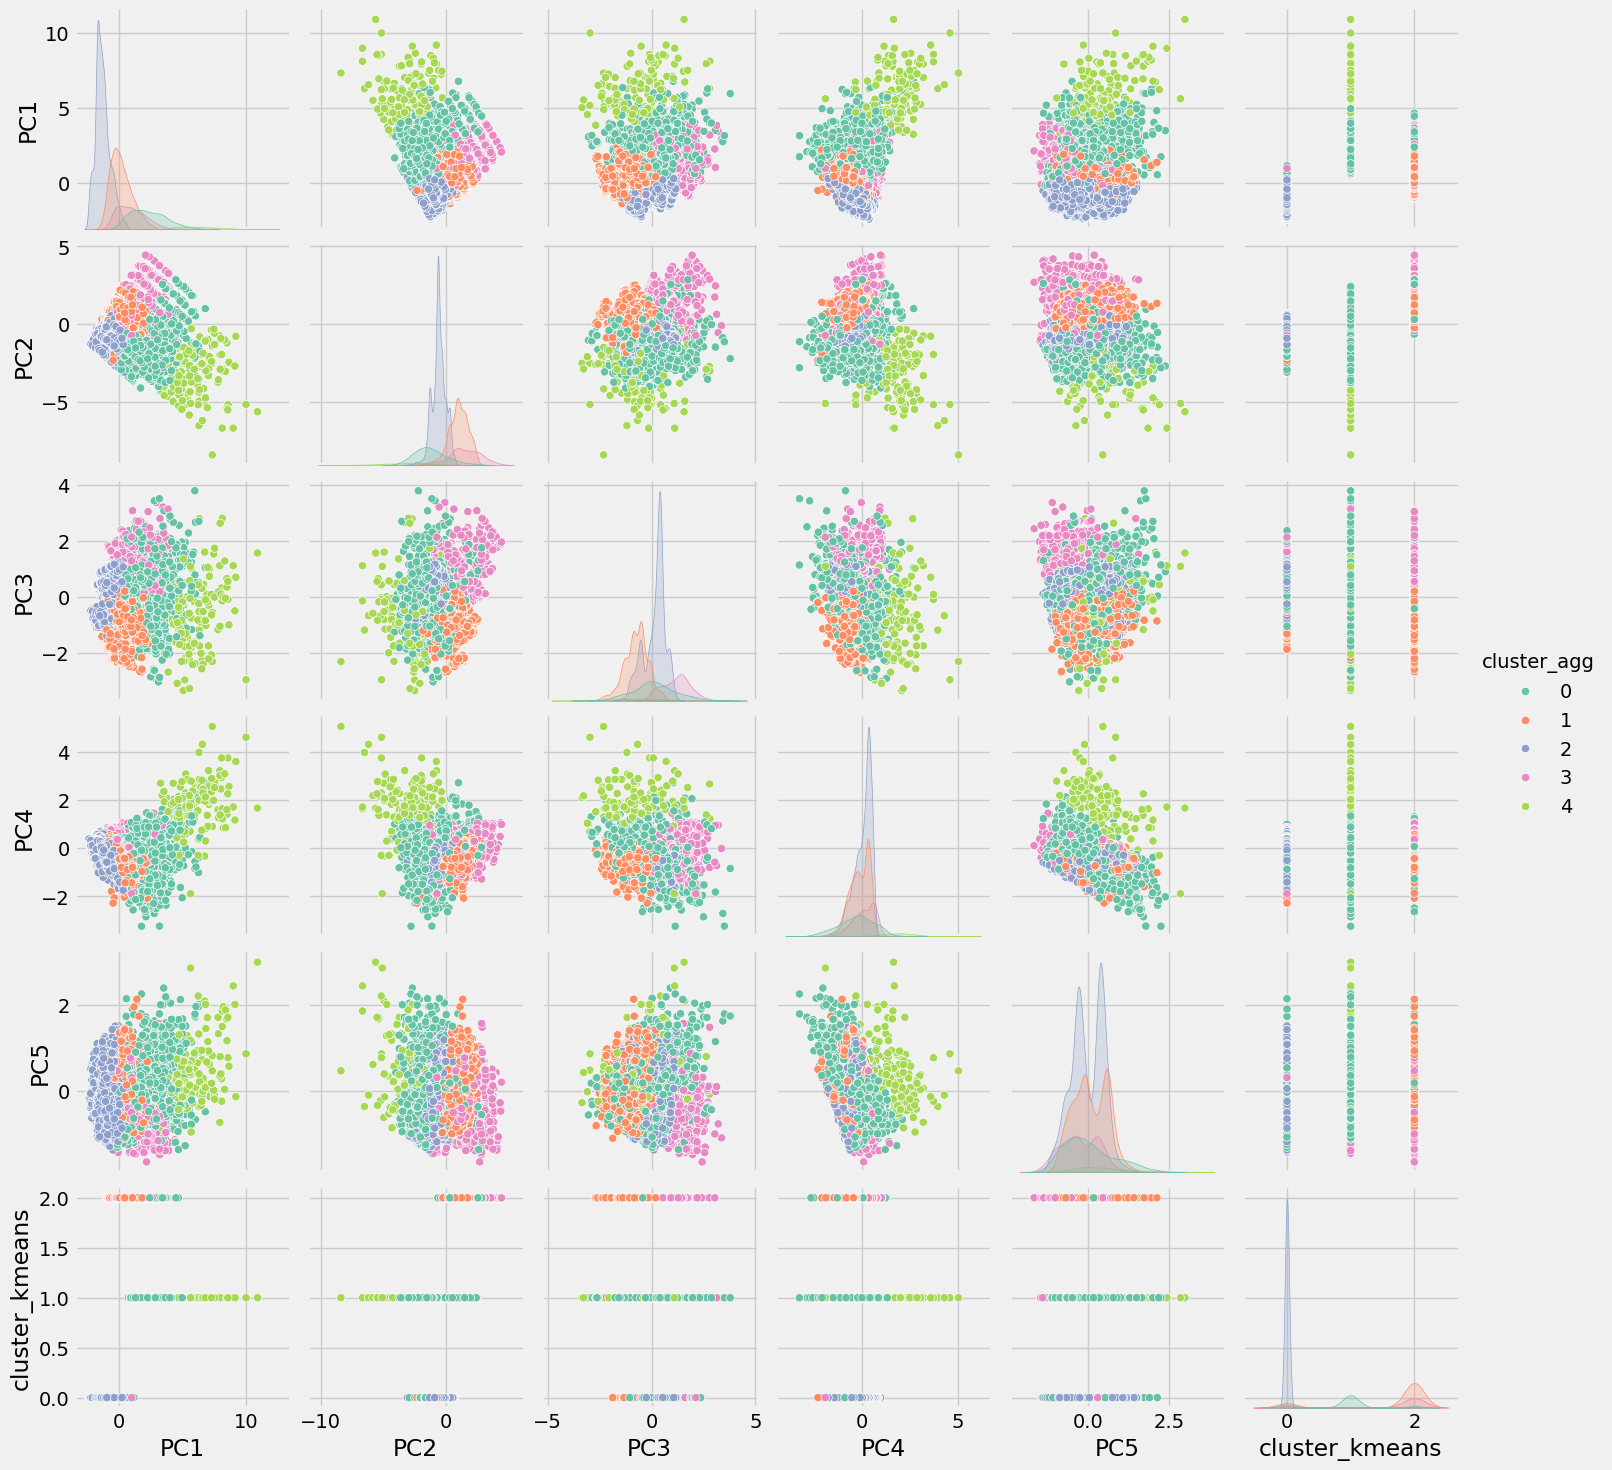

In [203]:
sns.pairplot(pca_df, hue='cluster_agg',  palette='Set2')

### Dendogram

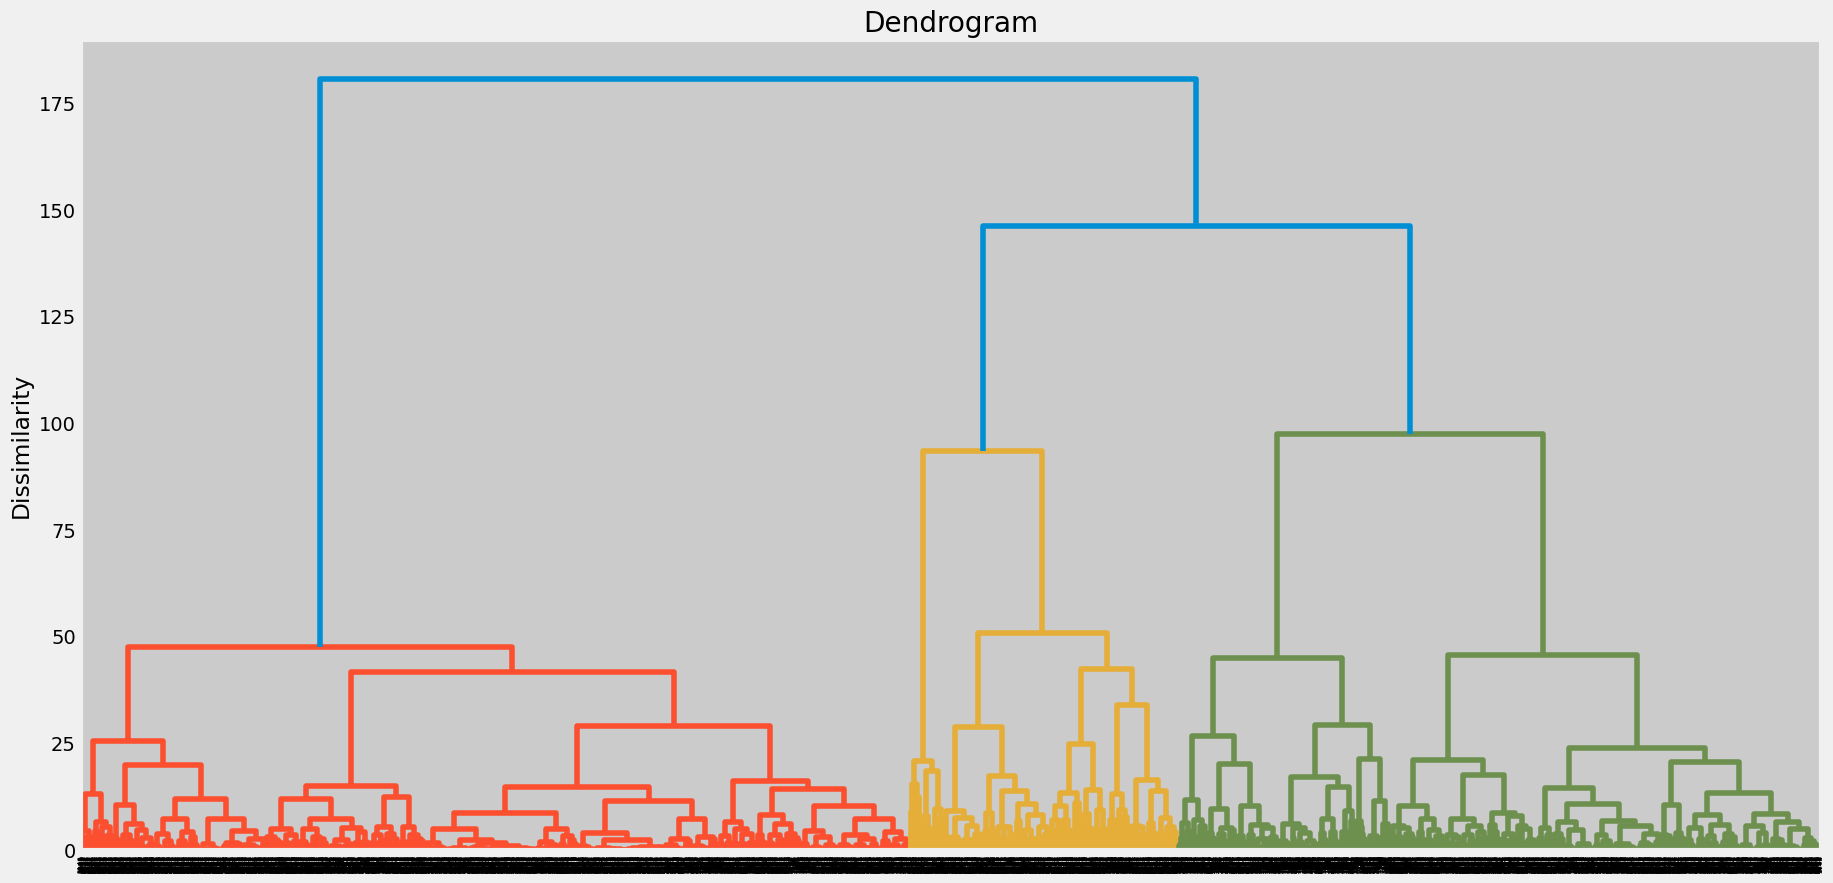

In [204]:
# Plotting the dendrogram of our data
plt.figure(figsize=(20, 10))
plt.title('Dendrogram')
plt.ylabel('Dissimilarity')
plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(pca_df, method = 'ward'))
# Extract color mapping
colors = set(dendro['color_list'])

# Create legend
for color in colors:
    plt.plot([], [], color=color, label=f'Cluster {color}')

plt.show()

In [205]:
# sns.pairplot(pca_df, hue='cluster_agg',  palette='Set2')

In [206]:
# # Plotting the dendrogram of our data
# plt.figure(figsize=(20, 10))
# plt.title('Dendrogram')
# plt.ylabel('Dissimilarity')
# plt.grid(True)
# dendrogram = sch.dendrogram(sch.linkage(pca_df, method = 'ward'))
# plt.show()

In [207]:
pca_df

,PC1,PC2,PC3,PC4,PC5,cluster_kmeans,cluster_agg
0,1.210342,-0.942417,1.716289,-0.775602,-0.539042,1,3
1,3.106434,1.620759,-0.155735,0.146716,-0.144947,2,0
2,1.148764,1.253681,0.778596,-0.262412,-0.347274,2,3
3,0.175801,-0.195085,2.020930,-0.668335,0.560764,0,3
4,6.293490,-2.698241,2.791945,2.656707,-0.081274,1,4
...,...,...,...,...,...,...,...
6665,0.432930,0.727604,0.199014,-0.427769,1.416879,2,1
6666,5.610386,-5.073897,1.091431,-1.885875,2.853014,1,4
6667,2.400333,0.321238,-0.421640,-1.268018,0.182532,2,0
6668,3.985815,-3.593737,0.311687,0.015994,0.783891,1,0


In [208]:
df_pueblos = pd.read_csv("../../data/processed/3_aggregated_pueblos.csv")
df_pueblos

,cmun,province,municipality,altitude,longitude,latitude,0-17,18-24,25-34,35-54,55+,male,female,total_population,nearest_airport,closest_distance_airport,nearest_train_station,closest_distance_train,closest_distance_hospital,nearest_hospital,closest_distance_school,nearest_school,koppen_climate,description,number_of_houses,town_size,connectivity_score,connectivity_category,towns_in_vicinity,economy_score,economy_score_area,autonomous_community,hospital_distance_score,school_distance_score,hospital_score_area,school_score_area,train_distance_score,airport_distance_score,transport_score,0-17_pct,18-24_pct,25-34_pct,35-54_pct,55+_pct,age_score,final_age_category
0,48067,Bizkaia,Muxika,18.95764,-2.692941,43.28967,302,96,101,463,584,810,736,1546,Aeropuerto de Bilbao,17.538797,Vitoria/Gasteiz,49.813235,12.530042,Hospital Galdakao-Usansolo,0.288898,Urretxindorra Hlhi,Cfb,Oceanic Climate - Mild temperatures and consis...,784.0,Mid,0.7180,Good,"1002, 1003, 1004, 1010, 1018, 1036, 1042, 1054...",4.10,16.823071,País Vasco,6,10,3.0,5.0,1,6,3.5,19.534282,6.209573,6.532988,29.948254,37.774903,17.302717,Balanced Town
1,15064,A Coruña,Paderne,151.44100,-8.176355,43.28677,265,119,160,648,1199,1173,1218,2391,Aeropuerto de A Coruña,16.418949,Betanzos-Cidade,3.219046,18.060709,Hospital Maritimo De Oza,2.891490,CPR Plurilingüe Nuestra Señora del Carmen,Csb,"Mediterranean Warm Summer - Cooler, wet winter...",1277.0,Mid,0.8460,Excellent,"15001, 15003, 15006, 15009, 15010, 15021, 1502...",5.90,14.034524,Galicia,4,10,2.0,5.0,10,6,8.0,11.083229,4.976997,6.691761,27.101631,50.146382,-10.664994,Highly Aging Town
2,15039,A Coruña,Irixoa,362.87660,-8.058925,43.28474,119,61,95,364,694,666,667,1333,Aeropuerto de A Coruña,25.929988,Oza Dos Rios,12.729931,24.662261,Hospital Juan Cardona,2.337612,CPI Plurilingüe Virxe da Cela,Cfb,Oceanic Climate - Mild temperatures and consis...,788.0,Mid,0.6420,Good,"15001, 15003, 15009, 15010, 15021, 15024, 1502...",0.00,8.933750,Galicia,3,10,1.5,5.0,6,6,6.0,8.927232,4.576144,7.126782,27.306827,52.063016,-13.840960,Highly Aging Town
3,48062,Bizkaia,Mendata,107.88860,-2.633333,43.28333,58,28,32,113,151,201,181,382,Aeropuerto de Bilbao,22.420417,Vitoria/Gasteiz,49.185946,16.396774,Hospital Galdakao-Usansolo,3.845322,Munitibar Hlhi,Cfb,Oceanic Climate - Mild temperatures and consis...,213.0,Small,0.7410,Good,"1002, 1003, 1018, 1036, 1042, 1063, 20003, 200...",0.00,15.153360,País Vasco,4,10,2.0,5.0,1,6,3.5,15.183246,7.329843,8.376963,29.581152,39.528796,16.753927,Balanced Town
4,48905,Bizkaia,Zamudio,44.55854,-2.866667,43.28333,528,226,291,1016,1251,1650,1662,3312,Aeropuerto de Bilbao,3.998229,Vitoria/Gasteiz,51.562825,4.828458,Imq Clínica Virgen Blanca,0.272147,Zamudio Hlhi,Cfb,Oceanic Climate - Mild temperatures and consis...,1497.0,Big,0.9425,Excellent,"1002, 1003, 1004, 1010, 1018, 1036, 1042, 1054...",35.25,31.005961,País Vasco,10,10,5.0,5.0,1,10,5.5,15.942029,6.823671,8.786232,30.676329,37.771739,21.724034,Balanced Town
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7611,11007,Cádiz,Barbate,15.97273,-5.918903,36.19282,3720,1797,2572,6793,7843,11326,11399,22725,Helipuerto de Algeciras,43.604312,Los Barrios,41.263907,28.159006,Hospital Viamed Novo Sancti Petri,0.084531,C.E.I.P. Estrella del Mar,Csa,"Mediterranean Hot Summer - Hot, dry summers an...",11870.0,Big,0.9915,Excellent,"11001, 11014, 11015, 11025, 11031, 11035, 1103...",69.35,98.668750,Andalucía,2,10,1.0,5.0,1,4,2.5,16.369637,7.907591,11.317932,29.892189,34.512651,31.797580,Young & Growing
7612,11022,Cádiz,"Línea de la Concepción, La",10.40490,-5.348256,36.16118,11924,4933,8008,19871,20251,32036,32951,64987,Helipuerto de Algeciras,9.068408,San Roque-La Linea,9.561508,1.236263,Hospital De La Línea De La Concepción,0.343316,C.D.P. Providencia del Sagrado Corazón,Csa,"Mediterranean Hot Summer - Hot, dry summers an...",29253.0,Big,0.

In [209]:
df_pueblos.query("total_population < 6000", inplace=True)
df_pueblos = df_pueblos.dropna(subset=['koppen_climate'])
df_pueblos.reset_index(inplace=True)
df_pueblos.shape

(6670, 47)

In [210]:
pca_df.reset_index(inplace=True)
pca_df.shape

(6670, 8)

In [211]:
df_pueblos = pd.concat([df_pueblos, pca_df[["cluster_kmeans", "cluster_agg"]]], axis=1)

df_pueblos.industry_transport_cluster_agg.isnull().sum()
df_pueblos.industry_transport_cluster_kmeans.isnull().sum()

AttributeError: 'DataFrame' object has no attribute 'industry_transport_cluster_agg'

In [214]:

import plotly.express as px

# Create the Interactive Map with Hover Text
fig = px.scatter_mapbox(df_pueblos, 
                        lat="latitude",  
                        lon="longitude",  
                        color="cluster_kmeans",  
                        hover_data=["province"],  
                        zoom=5,
                        size_max=50,
                        color_discrete_map={
                            0: "#1f77b4", 
                            1: "#ff7f0e", 
                            2: "#2ca02c", 
                            3: "#d62728", 
                            4: "#9467bd", 
                            5: "#8c564b"
                        }
                        )

# Set map style
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(width=1200, height=800)

fig.update_layout(
    coloraxis_colorbar=dict(title='Clusters')
)
fig.update_layout(title="Cluster Kmeans by industry and transport")

# Show the figure
fig.show()

/var/folders/w9/bt5d4t050m7fd91t2r7l1mlh0000gn/T/ipykernel_92479/419298455.py:4: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(df_pueblos,


In [216]:
title = "Communities in Spain"

lats = df_pueblos.latitude
lons = df_pueblos.longitude

fig = px.scatter_mapbox(df_pueblos, 
                     lat=lats, 
                     lon=lons,
                     hover_data=["municipality", "altitude"], 
                     color="cluster_agg",
                     zoom=5,
                     color_discrete_sequence=px.colors.qualitative.Set1
                     )

# Adjust the size reference to make small points more visible
fig.update_traces(marker=dict(sizeref=1000))  # Decrease this value to make points larger

fig.update_geos(fitbounds="locations")
fig.update_layout(height=1000, width=1000)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":50,"t":50,"l":50,"b":50})
fig.update_layout(
    coloraxis_colorbar=dict(title='Clusters')
)
fig.update_layout(title="Cluster Aggregations by industry and transport")

fig.show()

/var/folders/w9/bt5d4t050m7fd91t2r7l1mlh0000gn/T/ipykernel_92479/996542193.py:6: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [217]:
# Initialize KMeans with desired number of clusters (e.g., 3)
dbscan_cluster = DBSCAN(eps = 0.05, min_samples = 200)

# Fit KMeans on PCA-reduced data
dbscan_cluster.fit_predict(model_array)

# Get cluster labels
pca_df['cluster_dbscan'] = dbscan_cluster.labels_

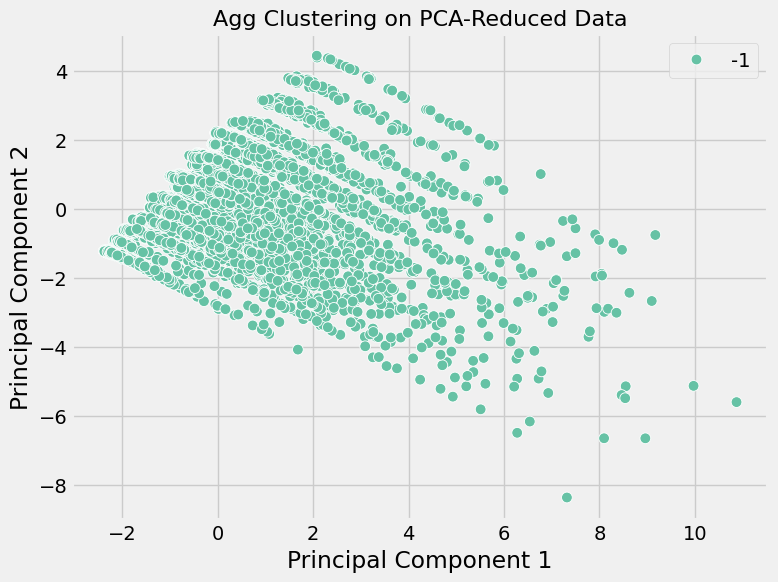

In [218]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster_dbscan', data=pca_df, palette='Set2', s=60)
plt.title('Agg Clustering on PCA-Reduced Data', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [219]:
df_pueblos.to_csv("../../data/output/industry_transport_clusters.csv")